In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pycaret
import datetime

In [4]:
dataset = pd.read_csv('IFR2.csv')

In [5]:
dataset[:11]

,CompletedSurveyId,PatientId,PatientGender,PatientAge,PostalCode,DateSurveyed,screeningmode,disclaimer_new,howbreak,eligible_hidden,...,fpp_info,rsrch_data_use,rsrch_future_link,rsrch_upcoming,Chld_task_bmdr,Chld_task_fall_Prev,Chld_task_fpletter_notx,Chld_task_fpletter_tx,Chld_task_newfollowup_notx,Chld_task_priSpecialist_referral
0,103299,400021,1,58,H0H,2017/07/04,1,1,1,1,...,2,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
1,103300,400022,1,56,H0H,2017/07/04,1,1,1,1,...,4,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN
2,103305,400023,2,68,H0H,2017/07/04,1,1,1,1,...,3,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN
3,103309,400025,1,76,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,103311,400027,1,57,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
5,103322,400030,1,78,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0
6,103323,400031,1,77,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0
7,103330,400034,1,75,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN
8,103334,400035,1,61,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0
9,103340,400037,1,65,H0H,2017/07/04,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0


In [6]:
obreak_date = pd.to_datetime(dataset.obreak_date)
datebone = pd.to_datetime(dataset.datebone)

In [7]:
dataset["datebone"]

0      2017/05/26
1      2017/04/11
2      2017/06/21
3      2017/06/19
4      2017/06/26
          ...    
795    2018/01/21
796    2018/02/01
797    2018/01/24
798    2018/01/29
799    2018/01/19
Name: datebone, Length: 800, dtype: object

In [8]:
y = ( abs( datebone - obreak_date))

In [9]:
y.dt.days

0         NaN
1         NaN
2         NaN
3      5464.0
4      2518.0
        ...  
795       NaN
796       NaN
797       NaN
798       NaN
799       NaN
Length: 800, dtype: float64

In [10]:
dataset["days"] = y.dt.days

In [11]:
dataset["days"].value_counts()

420.0     2
2518.0    2
265.0     2
3530.0    2
334.0     2
         ..
1407.0    1
3638.0    1
4467.0    1
514.0     1
401.0     1
Name: days, Length: 135, dtype: int64

In [12]:
dataset

,CompletedSurveyId,PatientId,PatientGender,PatientAge,PostalCode,DateSurveyed,screeningmode,disclaimer_new,howbreak,eligible_hidden,...,rsrch_data_use,rsrch_future_link,rsrch_upcoming,Chld_task_bmdr,Chld_task_fall_Prev,Chld_task_fpletter_notx,Chld_task_fpletter_tx,Chld_task_newfollowup_notx,Chld_task_priSpecialist_referral,days
0,103299,400021,1,58,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN
1,103300,400022,1,56,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN
2,103305,400023,2,68,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN
3,103309,400025,1,76,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,5464.0
4,103311,400027,1,57,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,114633,404703,1,50,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0,NaN
796,114636,404704,1,55,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN
797,114639,404705,1,50,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
798,114643,404706,1,62,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN


In [13]:
dataset['second_IFR'] = np.where(dataset['days'] <= 730, True, False)

In [14]:
dataset

,CompletedSurveyId,PatientId,PatientGender,PatientAge,PostalCode,DateSurveyed,screeningmode,disclaimer_new,howbreak,eligible_hidden,...,rsrch_future_link,rsrch_upcoming,Chld_task_bmdr,Chld_task_fall_Prev,Chld_task_fpletter_notx,Chld_task_fpletter_tx,Chld_task_newfollowup_notx,Chld_task_priSpecialist_referral,days,second_IFR
0,103299,400021,1,58,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,False
1,103300,400022,1,56,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,False
2,103305,400023,2,68,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,False
3,103309,400025,1,76,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,5464.0,False
4,103311,400027,1,57,H0H,2017/07/04,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2518.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,114633,404703,1,50,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0,NaN,False
796,114636,404704,1,55,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,False
797,114639,404705,1,50,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,False
798,114643,404706,1,62,H0H,2018/02/01,1,1,1,1,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,False


In [15]:
dataset = dataset.drop('days', axis=1)
dataset = dataset.drop('DateSurveyed', axis=1)
dataset = dataset.drop('obreak_date', axis=1)
dataset = dataset.drop('PostalCode', axis=1)

In [16]:

data = dataset[["PatientAge","PatientGender","obreak_frac_count","whereliv", "ptunsteady","oralster", "obreak_hip","parentbreak","alcohol","ptfall","wtcurr_lbs", "smoke", "marital", 'arthritis', 'diabetes', "education","second_IFR"]]


In [17]:
data["second_IFR"].value_counts()

False    760
True      40
Name: second_IFR, dtype: int64

In [18]:
data.dtypes

PatientAge             int64
PatientGender          int64
obreak_frac_count    float64
whereliv             float64
ptunsteady             int64
oralster               int64
obreak_hip           float64
parentbreak            int64
alcohol                int64
ptfall                 int64
wtcurr_lbs           float64
smoke                  int64
marital              float64
arthritis            float64
diabetes             float64
education            float64
second_IFR              bool
dtype: object

In [19]:
data["obreak_frac_count"].fillna(0, inplace=True)

missing = pd.DataFrame(data.isnull().sum(), columns=['Total'])
missing['%'] = (missing['Total'] / dataset.shape[0]) * 100
missing.sort_values(by='%', ascending=False)

/var/folders/78/_7qjvcc53r51sg_ksfn_bdzh0000gn/T/ipykernel_49237/2170095924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["obreak_frac_count"].fillna(0, inplace=True)


,Total,%
obreak_hip,783,97.875
arthritis,693,86.625
diabetes,685,85.625
wtcurr_lbs,188,23.500
education,188,23.500
marital,76,9.500
whereliv,41,5.125
PatientAge,0,0.000
smoke,0,0.000
alcohol,0,0.000


In [20]:
import pycaret

from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'second_IFR', session_id=2, fix_imbalance = True, remove_multicollinearity = True, categorical_features = ["PatientGender","obreak_frac_count","whereliv", "ptunsteady","oralster", "obreak_hip","parentbreak","alcohol","ptfall", "smoke", "marital", 'arthritis', 'diabetes', "education"], numeric_features=["PatientAge", "wtcurr_lbs"]) 

,Description,Value
0,session_id,2
1,Target,second_IFR
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(800, 17)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9500,0.9419,0.3000,0.5000,0.3605,0.3383,0.3566,0.1010
dummy,Dummy Classifier,0.9499,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
lightgbm,Light Gradient Boosting Machine,0.9482,0.9507,0.3667,0.5500,0.4233,0.3975,0.4148,0.0520
rf,Random Forest Classifier,0.9481,0.9449,0.1000,0.1500,0.1200,0.1092,0.1113,0.1280
qda,Quadratic Discriminant Analysis,0.9481,0.4991,0.0000,0.0000,0.0000,-0.0028,-0.0032,0.0150
catboost,CatBoost Classifier,0.9446,0.9419,0.3833,0.3667,0.3605,0.3349,0.3422,1.9540
gbc,Gradient Boosting Classifier,0.9428,0.9309,0.4667,0.4350,0.4293,0.4010,0.4117,0.0970
dt,Decision Tree Classifier,0.9375,0.6831,0.4000,0.4012,0.3752,0.3463,0.3594,0.0130
ada,Ada Boost Classifier,0.9321,0.8996,0.3667,0.3700,0.3479,0.3143,0.3241,0.0630
lr,Logistic Regression,0.9035,0.9384,0.5833,0.3002,0.3781,0.3341,0.3650,0.8500


In [22]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [23]:
tuned_dt = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9464,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [24]:
data

,PatientAge,PatientGender,obreak_frac_count,whereliv,ptunsteady,oralster,obreak_hip,parentbreak,alcohol,ptfall,wtcurr_lbs,smoke,marital,arthritis,diabetes,education,second_IFR
0,58,1,0.0,1.0,1,0,NaN,2,0,1,158.0,1,NaN,NaN,NaN,NaN,False
1,56,1,0.0,2.0,1,0,NaN,0,0,1,185.0,0,4.0,NaN,NaN,3.0,False
2,68,2,0.0,2.0,0,0,NaN,0,0,0,NaN,0,3.0,NaN,NaN,NaN,False
3,76,1,1.0,2.0,0,0,NaN,0,0,0,156.0,0,2.0,1.0,NaN,4.0,False
4,57,1,0.0,NaN,0,0,NaN,2,0,1,NaN,0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,1,0.0,2.0,0,0,NaN,0,0,0,NaN,0,2.0,NaN,NaN,4.0,False
796,55,1,0.0,2.0,0,0,NaN,0,0,0,NaN,0,2.0,NaN,NaN,4.0,False
797,50,1,0.0,2.0,0,0,NaN,0,0,0,147.0,0,2.0,NaN,NaN,4.0,False
798,62,1,0.0,2.0,0,0,NaN,1,0,0,NaN,0,2.0,NaN,NaN,NaN,False


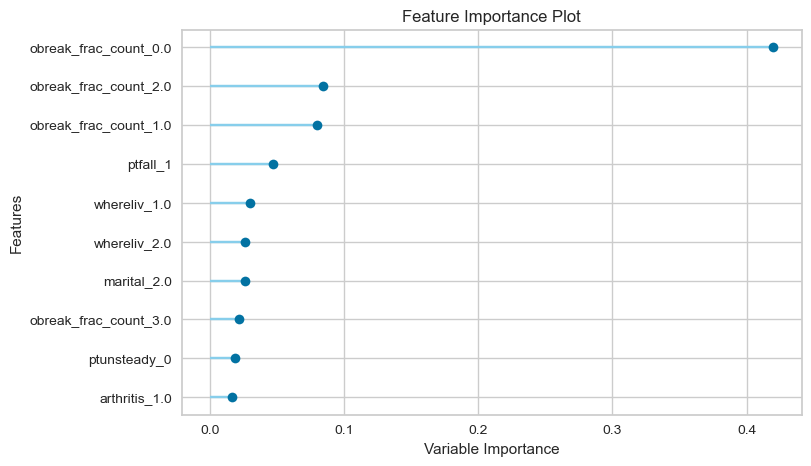

/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvil

/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, catego

/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvil

/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/yohannkuruvil

In [25]:
plot_model(best, plot = 'feature')

In [97]:
best.feature_importances_